In [83]:
import numpy as np

In [84]:
import matplotlib.pyplot as plt

In [85]:
import seaborn as sns

In [86]:
import pandas as pd
df=pd.read_csv("BankChurners.csv",sep=";")

In [87]:
print(df.isnull().sum())

CLIENTNUM,"Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"    0
dtype: int64


In [88]:
print(df.head())

  CLIENTNUM,"Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Months_on_book","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Amt","Total_Trans_Ct","Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
0  768805383,"Existing Customer",45,"M",3,"High S...                                                                                                                                                                                                                                                                                                  

In [89]:
df.describe()

,"CLIENTNUM,""Attrition_Flag"",""Customer_Age"",""Gender"",""Dependent_count"",""Education_Level"",""Marital_Status"",""Income_Category"",""Card_Category"",""Months_on_book"",""Total_Relationship_Count"",""Months_Inactive_12_mon"",""Contacts_Count_12_mon"",""Credit_Limit"",""Total_Revolving_Bal"",""Avg_Open_To_Buy"",""Total_Amt_Chng_Q4_Q1"",""Total_Trans_Amt"",""Total_Trans_Ct"",""Total_Ct_Chng_Q4_Q1"",""Avg_Utilization_Ratio"",""Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"",""Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"""
count,10127
unique,10127
top,"768805383,""Existing Customer"",45,""M"",3,""High S..."
freq,1


In [90]:
new_df = df.dropna()

print(new_df.to_string())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



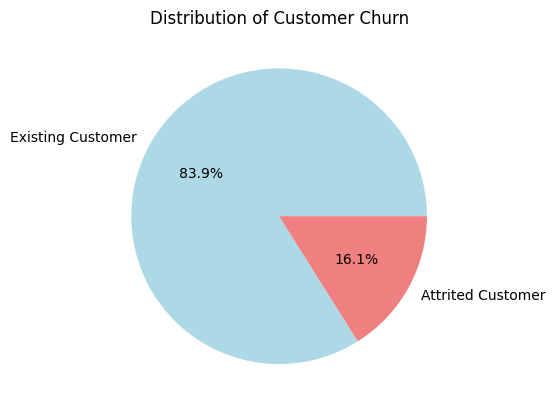

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
bank_data = pd.read_csv('BankChurners.csv')
attrition_count = bank_data['Attrition_Flag'].value_counts()
plt.pie(attrition_count, labels=attrition_count.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Customer Churn')
plt.show()


In [92]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
bank_data = pd.read_csv('BankChurners.csv')
def clean_text(text):
    text = text.lower()
    text = re.sub(r"M", "Male", text)
    return text


In [93]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the BankChurners dataset
bank_data = pd.read_csv('BankChurners.csv')

# Assuming 'Comments' is the column containing textual data
X = bank_data['Marital_Status'].astype(str)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=20, ngram_range=(1,4), max_features=250)

# Fit the vectorizer to the data and transform the data
X_transformed = vectorizer.fit_transform(X)

# Convert to dense matrix
X_dense = X_transformed.todense()

print(X_dense)


[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [94]:
# Evaluate the model using repeated k-fold cross-validation
def evaluate_model(X, y):
    results_train = []
    results_test = []
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Compile the model outside the loop
    model = get_model(X.shape[1], 1)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    for train_ix, test_ix in cv.split(X):
        x_train, x_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        # Train the model
        model.fit(x_train, y_train, verbose=0, epochs=50)
        # Predict probabilities
        yhat_train = model.predict_proba(x_train)
        yhat_test = model.predict_proba(x_test)
        # Compute log loss
        train_log_loss = log_loss(y_train, yhat_train)
        test_log_loss = log_loss(y_test, yhat_test)
        results_train.append(train_log_loss)
        results_test.append(test_log_loss)
    return results_train, results_test, model